In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

pd.set_option('display.max_columns', None)
plt.style.use('seaborn')

In [245]:
data = pd.read_csv('database/train.csv', index_col=0)
print(data.shape)
data.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [246]:
def drop_it(list, *args):
    for arg in args: 
        if arg not in list: list.append(arg)
    print(list)

TARGET = 'SalePrice'
drop_list = []                           # Creating a list of columns that I've mark as 'to drop' on the way..

### Target variable

Let us first check the distribution of our target variable

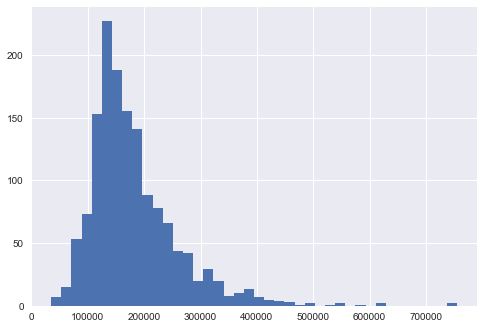

In [247]:
data[TARGET].hist(bins=40)

We can see that our target is POSITIVELY SKEWED.

Well, that makes sense as most people cannot afford costly house. Let's keep this info in back of our mind.

### Correlation Soup

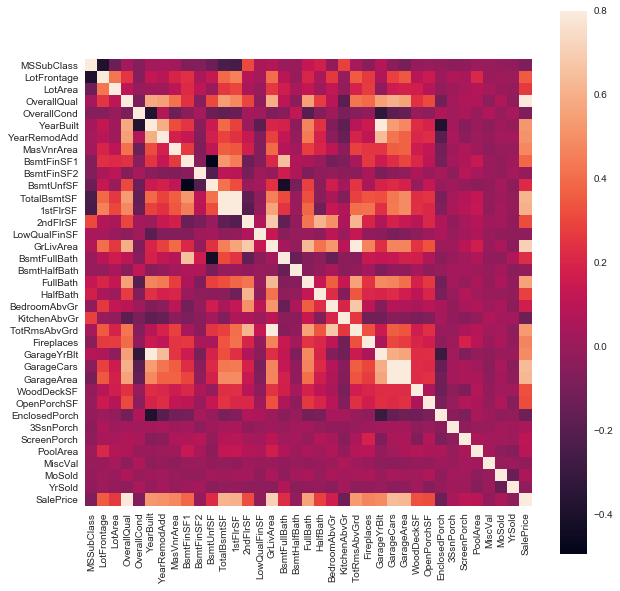

In [248]:
corr_map = data.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_map, square=True, vmax=.8)

The very first things that catches the eye are:

* The two bright boxes

If we consider the first bright box, the participants are 'TotalBsmtSF' and '1stFlrSF'. That means there is high collinearity between them. That means if one increases, other increases as well. We can see that they've high coll with the TARGET too. This makes it a problem of 'Multi-coll'. Both the features gives the same info.

Coming to the second bright box, 'GarageCars' and 'GarageArea'. Which seems pretty obvious, more the area, more the cars could be stored in the garage. And all the above things now.


#### Top Correlations (with TARGET)

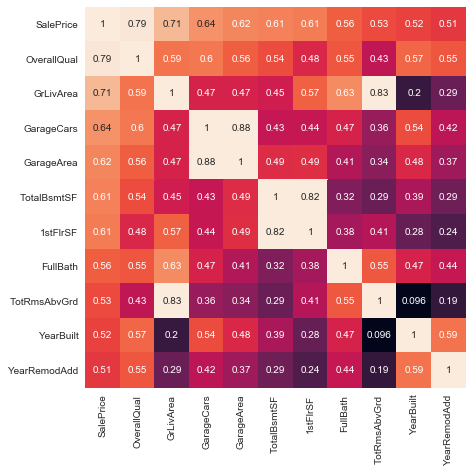

In [249]:
n = 10

top_n_corr = corr_map.nlargest(n+1, TARGET).index # n+1 because the 1st feature will be the TARGET itself

plt.figure(figsize=(7, 7))
top_n_corr = corr_map.loc[top_n_corr][top_n_corr]
sns.heatmap(top_n_corr ,square=True, annot=True, cbar=False, vmax=0.8)

There are 3 cases of high Multi-corr:

* GarageCars-GarageArea
* TotalBsmtSF-1stFlrSF
* GrLivArea-TotalRmsAbvGrd

First 2 I've explained earlier, the last one makes obvious sense too. The more the area of Ground Floor, the more general sized rooms can fit in the floors above.

As we've to drop one of two in every pair, we'll drop the one which has a comparitively low collinearity with our TARGET.

To drop:
* GarageArea
* 1stFlrSF
* TotRmsAbvGrd

**[PREPROCESSING]**

In [250]:
data.drop(columns=['GarageArea', '1stFlrSF', 'TotRmsAbvGrd'], inplace=True)

#### Scatter plot between the top corr features

In [251]:
top_n_corr

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855


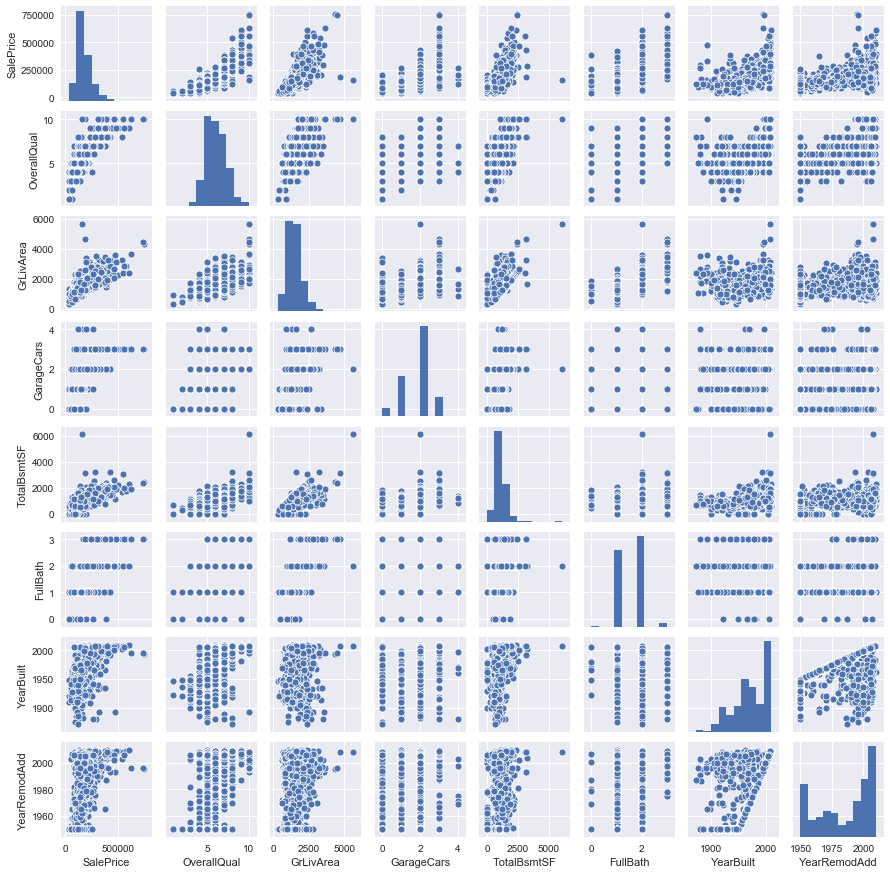

In [252]:
top_corr_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']

sns.pairplot(data[top_corr_features], height=1.5)

We can infer:

* OverallQual affects the SalePrice **exponentially**! And why not?

* GrLivArea has a **linear relationship** with SalePrice. Though there are *2 points* that seems like outliers, cause they do not follow the pattern at all. I'll keep that in mind

* GarageCars v/s SalePrice is quiet interesting. It's **linear relationship**, but all of a sudden when GarageCars reaches 4 ....BAM! Super Price Drop. Why did this happen..? I checked around and found out various things:
    * The OverallQual of those houses were very low, ranging from 4-7. This could be because:
        * maybe they were not even houses but garages only. 
        * Or belongs to a mechanic who do needs a bigger Garage.
        * Or belongs to a wholesaler who needs a bigger garage as a storehouse.
    * Most of those houses were very very old.
    * There was no or very old Remodification.
    * Low number of FullBath comparitively.

* TotalBsmtSF has a **high-slope linear relationship** with SalePrice. However, there is one outlier to the extreme bottom-right of the graph. I checked around the values of other top_n_features and found something very strange. Most of the values are good above the 75% mark, still the SalePrice is low. NOW THIS IS CALLED A TRUE OUTLIER.

* FullBath has a **Linear Relationship** with SalePrice. Nothing much to say.

* YearBuilt v/s SalePrice is quite interesting. If we sharply see the, there is a vague upper-border line that is growing exponentially. That infers that the price of the houses are increasing with time (maybe due to inflation or something). But one thing to notice is, that very old houses have a high SalePrice. This could be because they're now considered antique. Also, the most latest houses have very high price, well that's obvious isn't it..?

* YearRemodAdd v/s SalePrice has mostly the similar relationship as YearBuild v/s SalePrice.
    

## Missing Data

In [254]:
missing_count = data.isnull().sum().sort_values(ascending=False)
missing_percentage = missing_count/len(data) * 100

missing_df = pd.concat([missing_count, missing_percentage], axis=1, keys=['Count', 'Percentage'])
missing_df = missing_df[missing_df['Count'] > 0]
missing_df

,Count,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


Before deleting any stuff, let's first check what the Nan value of various feature even mean.

* PoolQC : No pool
* MiscFeature : NAN
* Alley : No alley access
* Fence : No Fence
* FireplaceQu No Fireplace
* LotFrontage : NAN (as there is very low corr, we won't impute)
* Garage{XYZ} : No Garage
* Bsmt{XYZ} : No Basement
* MasVnr{XYZ} : NAN (as there is very low corr, we won't impute)
* Electrical : Only one null, it won't hurt to just remove that one sample.

#### **[PREPROCESSING]** Filling the NAN Values

In [255]:
for f in missing_df.index:
    if f not in ['MiscFeature', 'LotFrontage', 'MasVnrArea', 'MasVnrType', 'Electrical']:
        data[f] = np.where(data[f].isnull(), 'None', data[f])

#### Remaining NaN Features

In [256]:
missing_count = data.isnull().sum().sort_values(ascending=False)
missing_percentage = missing_count/len(data) * 100

missing_df = pd.concat([missing_count, missing_percentage], axis=1, keys=['Count', 'Percentage'])
missing_df = missing_df[missing_df['Count'] > 0]
missing_df

,Count,Percentage
MiscFeature,1406,96.301370
LotFrontage,259,17.739726
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493


**[PREPROCESSING]**

In [ ]:
# We'll just drop MiscFeature, LotFrontage, MasVnrType, MasVnrArea 
# because of very low corr with SalePrice

data.drop(columns=['MiscFeature', 'LotFrontage', 'MasVnrType', 'MasVnrArea'], inplace=True)

# The only feature left is Electrical, we'll remove that single sample
data.dropna(how='any', subset=['Electrical'], inplace=True)